### **Data Pre Processing**

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
import pandas as pd
# Load the datasets from CSV files

dallas = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/project-final-Byte-Busters/main/data/Dallas.csv', header='infer' ,low_memory=False)
arlington = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/project-final-Byte-Busters/main/data/Arlington.csv', header='infer' ,low_memory=False)
denton = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/project-final-Byte-Busters/main/data/Denton.csv', header='infer' ,low_memory=False)

In [3]:
# Convert the 'Date' column to datetime format
arlington['DATE'] = pd.to_datetime(arlington['DATE'])
dallas['DATE'] = pd.to_datetime(dallas['DATE'])
denton['DATE'] = pd.to_datetime(denton['DATE'])

In [4]:
cols_to_impute = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyRelativeHumidity','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindSpeed','HourlyWindDirection']

 **Dallas**

In [5]:
dallas.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,72258013960,2022-01-01 00:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.65,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
1,72258013960,2022-01-01 01:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.64,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
2,72258013960,2022-01-01 02:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.63,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
3,72258013960,2022-01-01 03:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.63,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
4,72258013960,2022-01-01 04:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.62,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28


In [6]:
dallas.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlyWetBulbTemperature,HourlyWindGustSpeed,...,ShortDurationPrecipitationValue180,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName
count,1.053600e+04,10536.00000,10536.00000,1.053600e+04,10536.000000,2899.000000,2899.000000,10150.000000,10058.000000,3159.000000,...,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.225801e+10,32.83839,-96.83583,1.476000e+02,6.916002,-0.000114,4.208348,61.352512,58.328097,25.155112,...,1.387500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,0.00000,0.00000,2.842306e-14,0.358855,0.045213,2.737678,21.693770,15.638864,5.774307,...,1.423725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.225801e+10,32.83839,-96.83583,1.476000e+02,4.000000,-0.250000,0.000000,12.000000,8.000000,16.000000,...,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,-0.030000,1.000000,44.000000,47.000000,21.000000,...,0.795000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,0.000000,3.000000,61.000000,62.000000,24.000000,...,1.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,0.030000,6.000000,79.000000,73.000000,29.000000,...,1.465000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,0.170000,8.000000,100.000000,81.000000,52.000000,...,4.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Specifying columns for data type conversion\

cols_dallas = ['HourlyDryBulbTemperature','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindDirection']

In [8]:
# Loop through columns in cols_dallas, extract the numeric part, and convert to float

for col in cols_dallas:
    dallas[col] = dallas[col].str.extract('(\d+)', expand=False).astype(float)

In [9]:
# Checking for missing values in all the relevant columns

for col in cols_to_impute:
    missing_values = dallas[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 384
Missing values in HourlyWetBulbTemperature: 478
Missing values in HourlyRelativeHumidity: 386
Missing values in HourlyDewPointTemperature: 386
Missing values in HourlyPrecipitation: 1884
Missing values in HourlySeaLevelPressure: 1801
Missing values in HourlyStationPressure: 476
Missing values in HourlyWindSpeed: 388
Missing values in HourlyWindDirection: 1090


In [10]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
dallas[cols_to_impute] = imputer.fit_transform(dallas[cols_to_impute])

In [11]:
# Checking for missing values in all the relevant columns after Imputation

for col in cols_to_impute:
    missing_values = dallas[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 0
Missing values in HourlyWetBulbTemperature: 0
Missing values in HourlyRelativeHumidity: 0
Missing values in HourlyDewPointTemperature: 0
Missing values in HourlyPrecipitation: 0
Missing values in HourlySeaLevelPressure: 0
Missing values in HourlyStationPressure: 0
Missing values in HourlyWindSpeed: 0
Missing values in HourlyWindDirection: 0


**Arlington**

In [12]:
arlington.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,72247953907,2022-01-01 00:18:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-16,7,29.66,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
1,72247953907,2022-01-01 00:27:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-16,7,29.66,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
2,72247953907,2022-01-01 00:53:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-15,7,29.65,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
3,72247953907,2022-01-01 01:53:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-15,7,29.65,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
4,72247953907,2022-01-01 02:53:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-15,7,29.63,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26


In [13]:
arlington.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureChange,HourlyPressureTendency,HourlyWindGustSpeed,Sunrise,Sunset,...,ShortDurationPrecipitationValue150,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName
count,1.093800e+04,10938.00000,1.093800e+04,1.093800e+04,10938.000000,2863.000000,2863.000000,2851.000000,365.000000,365.000000,...,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,6.904553,0.000014,4.223192,26.471414,619.610959,1836.087671,...,0.935833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,0.00000,1.421150e-14,2.842301e-14,0.404595,0.044873,2.748253,5.985668,75.262156,78.326753,...,1.013934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,4.000000,-0.240000,0.000000,16.000000,520.000000,1722.000000,...,0.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,-0.030000,1.000000,22.000000,542.000000,1750.000000,...,0.195000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,0.000000,3.000000,25.000000,620.000000,1836.000000,...,0.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,0.030000,6.000000,30.000000,705.000000,1918.000000,...,1.155000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,0.160000,8.000000,59.000000,731.000000,1940.000000,...,3.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Specifying columns for data type conversion

cols_arlington = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyDewPointTemperature','HourlyStationPressure','HourlyPrecipitation','HourlyWindSpeed','HourlySeaLevelPressure','HourlyWindDirection', 'HourlyRelativeHumidity']

In [15]:
# Loop through columns in cols_arlington, extract the numeric part, and convert to float

for col in cols_arlington:
    arlington[col] = arlington[col].str.extract('(\d+)', expand=False).astype(float)

In [16]:
# Checking for missing values in all the relevant columns

for col in cols_to_impute:
    missing_values = arlington[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 398
Missing values in HourlyWetBulbTemperature: 549
Missing values in HourlyRelativeHumidity: 398
Missing values in HourlyDewPointTemperature: 398
Missing values in HourlyPrecipitation: 2410
Missing values in HourlySeaLevelPressure: 2251
Missing values in HourlyStationPressure: 529
Missing values in HourlyWindSpeed: 482
Missing values in HourlyWindDirection: 836


In [17]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
arlington[cols_to_impute] = imputer.fit_transform(arlington[cols_to_impute])

In [18]:
# Checking for missing values in all the relevant columns after Imputation

for col in cols_to_impute:
    missing_values = arlington[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 0
Missing values in HourlyWetBulbTemperature: 0
Missing values in HourlyRelativeHumidity: 0
Missing values in HourlyDewPointTemperature: 0
Missing values in HourlyPrecipitation: 0
Missing values in HourlySeaLevelPressure: 0
Missing values in HourlyStationPressure: 0
Missing values in HourlyWindSpeed: 0
Missing values in HourlyWindDirection: 0


**Denton**

In [19]:
denton.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,72258903991,2022-01-01 00:18:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-16,7,29.66,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
1,72258903991,2022-01-01 00:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.66,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
2,72258903991,2022-01-01 01:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.63,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
3,72258903991,2022-01-01 02:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.63,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
4,72258903991,2022-01-01 03:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.63,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27


In [20]:
denton.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWetBulbTemperature,...,ShortDurationPrecipitationValue180,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName
count,1.080800e+04,1.080800e+04,1.080800e+04,1.080800e+04,10808.000000,2919.000000,2919.000000,10423.000000,8750.000000,10292.000000,...,11.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,6.906643,-0.000106,4.254539,64.744891,30.012730,56.977264,...,0.852727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,7.105756e-15,2.842302e-14,5.684605e-14,0.395309,0.045438,2.732153,22.760395,0.215588,16.311701,...,0.693903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,4.000000,-0.270000,0.000000,12.000000,29.370000,7.000000,...,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,-0.030000,2.000000,47.000000,29.880000,45.000000,...,0.345000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,0.000000,3.000000,67.000000,29.980000,61.000000,...,0.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,0.030000,6.000000,84.000000,30.130000,72.000000,...,1.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,0.170000,8.000000,100.000000,30.820000,80.000000,...,2.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Specifying columns for data type conversion

cols_denton = ['HourlyDryBulbTemperature','HourlyDewPointTemperature','HourlyStationPressure','HourlyPrecipitation','HourlyWindSpeed','HourlyWindDirection']

In [22]:
# Loop through columns in cols_denton, extract the numeric part, and convert to float

for col in cols_denton:
    denton[col] = denton[col].str.extract('(\d+)', expand=False).astype(float)

In [23]:
# Checking for missing values in all the relevant columns

for col in cols_to_impute:
    missing_values = denton[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 385
Missing values in HourlyWetBulbTemperature: 516
Missing values in HourlyRelativeHumidity: 385
Missing values in HourlyDewPointTemperature: 383
Missing values in HourlyPrecipitation: 2059
Missing values in HourlySeaLevelPressure: 2058
Missing values in HourlyStationPressure: 508
Missing values in HourlyWindSpeed: 434
Missing values in HourlyWindDirection: 693


In [24]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
denton[cols_to_impute] = imputer.fit_transform(denton[cols_to_impute])

In [25]:
# Checking for missing values in all the relevant columns after Imputation

for col in cols_to_impute:
    missing_values = denton[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 0
Missing values in HourlyWetBulbTemperature: 0
Missing values in HourlyRelativeHumidity: 0
Missing values in HourlyDewPointTemperature: 0
Missing values in HourlyPrecipitation: 0
Missing values in HourlySeaLevelPressure: 0
Missing values in HourlyStationPressure: 0
Missing values in HourlyWindSpeed: 0
Missing values in HourlyWindDirection: 0


### **EDA: Exploratory Data Analysis**

In [26]:
def extract_time_features(df):
    df['Hour'] = df['DATE'].dt.hour
    df['Time'] = df['DATE'].dt.strftime('%H:%M:%S')
    df['Date'] = df['DATE'].dt.date
    df['DayOfWeek'] = df['DATE'].dt.dayofweek
    df['Month'] = df['DATE'].dt.month
    df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)
    seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    df['Season'] = df['Season'].map(seasons)

# Apply the time feature extraction to each dataset
extract_time_features(arlington)
extract_time_features(dallas)
extract_time_features(denton)

print(arlington)

           STATION                DATE  LATITUDE  LONGITUDE  ELEVATION  \
0      72247953907 2022-01-01 00:18:00  32.65832  -97.09509      179.7   
1      72247953907 2022-01-01 00:27:00  32.65832  -97.09509      179.7   
2      72247953907 2022-01-01 00:53:00  32.65832  -97.09509      179.7   
3      72247953907 2022-01-01 01:53:00  32.65832  -97.09509      179.7   
4      72247953907 2022-01-01 02:53:00  32.65832  -97.09509      179.7   
...            ...                 ...       ...        ...        ...   
10933  72247953907 2022-12-31 21:53:00  32.65832  -97.09509      179.7   
10934  72247953907 2022-12-31 22:53:00  32.65832  -97.09509      179.7   
10935  72247953907 2022-12-31 23:53:00  32.65832  -97.09509      179.7   
10936  72247953907 2022-12-31 23:59:00  32.65832  -97.09509      179.7   
10937  72247953907 2022-12-31 23:59:00  32.65832  -97.09509      179.7   

                                     NAME REPORT_TYPE  SOURCE  \
0      ARLINGTON MUNICIPAL AIRPORT, TX US     

**Basic Statistical Tests**

In [27]:
# For Dallas
print("Basic Statistics for Dallas:")
print(dallas[['HourlyDryBulbTemperature','HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation',
              'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyRelativeHumidity',
              'HourlyWindSpeed', 'HourlyWindDirection']].describe())


Basic Statistics for Dallas:
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10536.000000              10536.000000   
mean                  67.197414                 58.333991   
std                   18.608601                 15.293785   
min                   11.000000                  8.000000   
25%                   55.000000                 48.000000   
50%                   68.000000                 61.000000   
75%                   81.000000                 72.000000   
max                  107.000000                 81.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10536.000000         10536.000000            10536.000000   
mean                   51.414822             0.001489               29.453747   
std                    17.581486             0.033942                0.470971   
min                     0.000000             0.000000               29.000000   
25%             

In [28]:
# For Arlington
print("Basic Statistics for Arlington:")
print(arlington[['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation',
              'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyRelativeHumidity',
              'HourlyWindSpeed', 'HourlyWindDirection']].describe())

Basic Statistics for Arlington:
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10938.000000              10938.000000   
mean                  66.799237                 58.075903   
std                   18.621383                 15.162909   
min                   11.000000                  8.000000   
25%                   54.250000                 48.000000   
50%                   68.000000                 61.000000   
75%                   80.000000                 72.000000   
max                  108.000000                 79.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10938.000000         10938.000000            10938.000000   
mean                   51.249222             0.001719               29.441497   
std                    17.430900             0.040534                0.465324   
min                     0.000000             0.000000               29.000000   
25%          

In [29]:
# For Denton
print("Basic Statistics for Denton:")
print(denton[['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation',
              'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyRelativeHumidity',
              'HourlyWindSpeed', 'HourlyWindDirection']].describe())

Basic Statistics for Denton:
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10808.000000              10808.000000   
mean                  65.053764                 56.960310   
std                   19.644345                 15.936749   
min                   10.000000                  7.000000   
25%                   52.000000                 46.000000   
50%                   66.000000                 60.000000   
75%                   80.000000                 71.000000   
max                  110.000000                 80.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10808.000000         10808.000000            10808.000000   
mean                   50.681699             0.000230               30.005838   
std                    17.623262             0.013871                0.202828   
min                     0.000000             0.000000               29.370000   
25%             

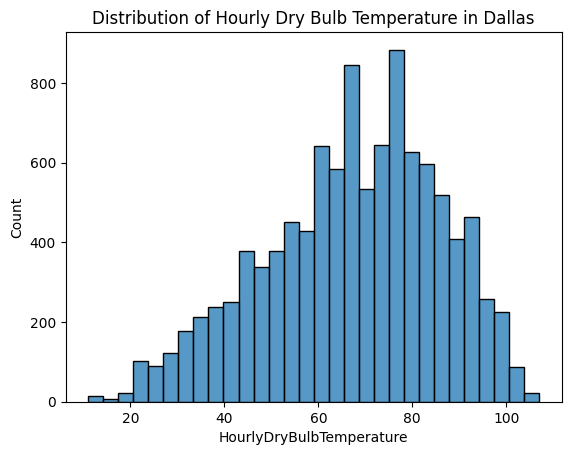

In [30]:

sns.histplot(dallas['HourlyDryBulbTemperature'], bins=30)
plt.title('Distribution of Hourly Dry Bulb Temperature in Dallas')
plt.show()

Temperature difference based on different times of the day

In [31]:
def categorize_day_night(hour):
    if 6 <= hour < 18:
        return 'Daytime'
    else:
        return 'Nighttime'

# Apply this function to your datasets
arlington['Day_Night'] = arlington['Hour'].apply(categorize_day_night)
dallas['Day_Night'] = dallas['Hour'].apply(categorize_day_night)
denton['Day_Night'] = denton['Hour'].apply(categorize_day_night)

In [32]:
# Calculate average temperatures
arlington_day_night_avg = arlington.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()
dallas_day_night_avg = dallas.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()
denton_day_night_avg = denton.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()


In [33]:
# Display the average temperatures
print("Arlington - Day vs Night Avg Temperature:\n", arlington_day_night_avg)
print("Dallas - Day vs Night Avg Temperature:\n", dallas_day_night_avg)
print("Denton - Day vs Night Avg Temperature:\n", denton_day_night_avg)


Arlington - Day vs Night Avg Temperature:
 Day_Night
Daytime      70.285486
Nighttime    63.472445
Name: HourlyDryBulbTemperature, dtype: float64
Dallas - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.709055
Nighttime    64.807656
Name: HourlyDryBulbTemperature, dtype: float64
Denton - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.248691
Nighttime    61.061842
Name: HourlyDryBulbTemperature, dtype: float64


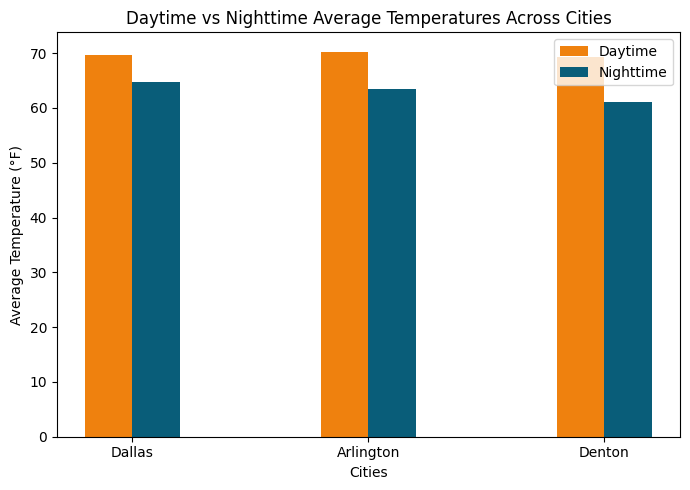

In [34]:
# Set up for multiple bar plot
bar_width = 0.2  # width of the bars
index = np.arange(3)  # Three cities

# Creating the plot
plt.figure(figsize=(7, 5))
plt.bar(index, [dallas_day_night_avg['Daytime'], arlington_day_night_avg['Daytime'],denton_day_night_avg['Daytime']],
        bar_width, color='#EF810E', label='Daytime')
plt.bar(index + bar_width, [dallas_day_night_avg['Nighttime'],arlington_day_night_avg['Nighttime'],  denton_day_night_avg['Nighttime']],
        bar_width, color='#095D79', label='Nighttime')

plt.xlabel('Cities')
plt.ylabel('Average Temperature (°F)')
plt.title('Daytime vs Nighttime Average Temperatures Across Cities')
plt.xticks(index + bar_width / 2, ['Dallas', 'Arlington', 'Denton'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Key Takeaways:**

*   The smaller difference in nighttime and daytime temperatures in Dallas aligns with a stronger UHI effect, where the urban environment retains more heat.
*   Arlington, while also urban, shows a slightly more significant temperature drop at night than Dallas, indicating a somewhat less intense UHI effect.

*  Denton’s larger temperature drop is consistent with rural areas that do not exhibit strong UHI effects.

In [35]:
# Function to plot data
def plot_data(data, city_name):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data['HourlyDryBulbTemperature'])
    plt.title(f'{city_name} Temperature')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=data['HourlyRelativeHumidity'])
    plt.title(f'{city_name} Humidity')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data['HourlyWindSpeed'])
    plt.title(f'{city_name} Wind Speed')

    plt.tight_layout()
    plt.show()


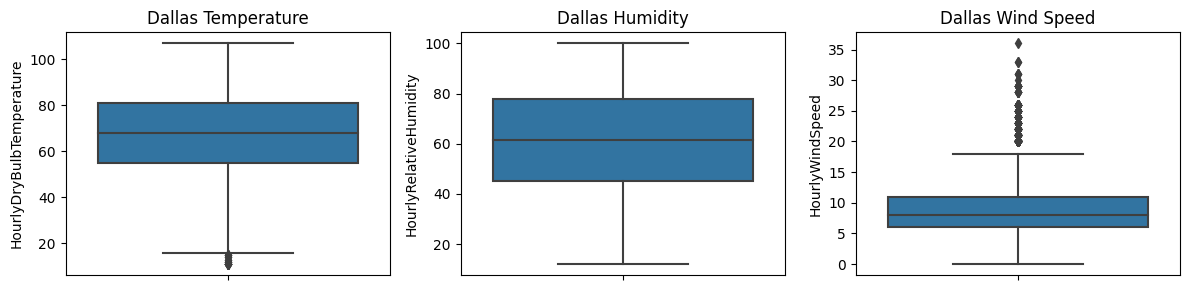

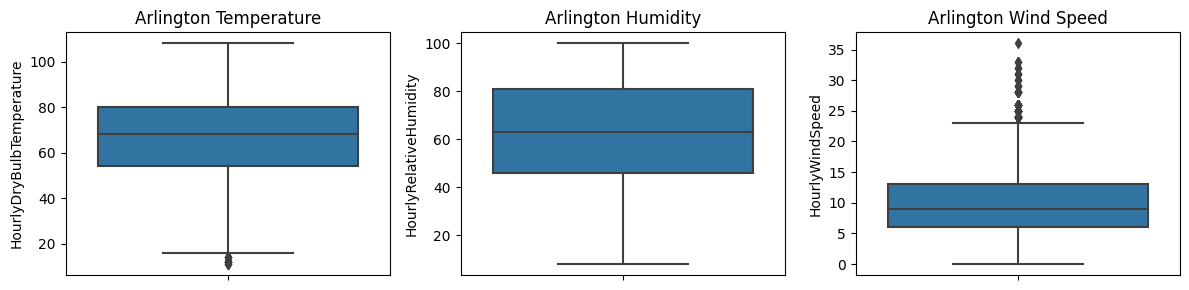

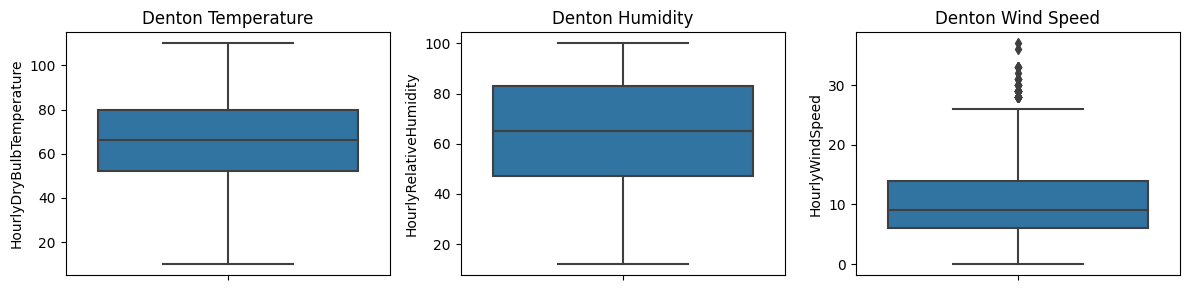

In [36]:
# Plot for each city
plot_data(dallas, 'Dallas')
plot_data(arlington, 'Arlington')
plot_data(denton, 'Denton')

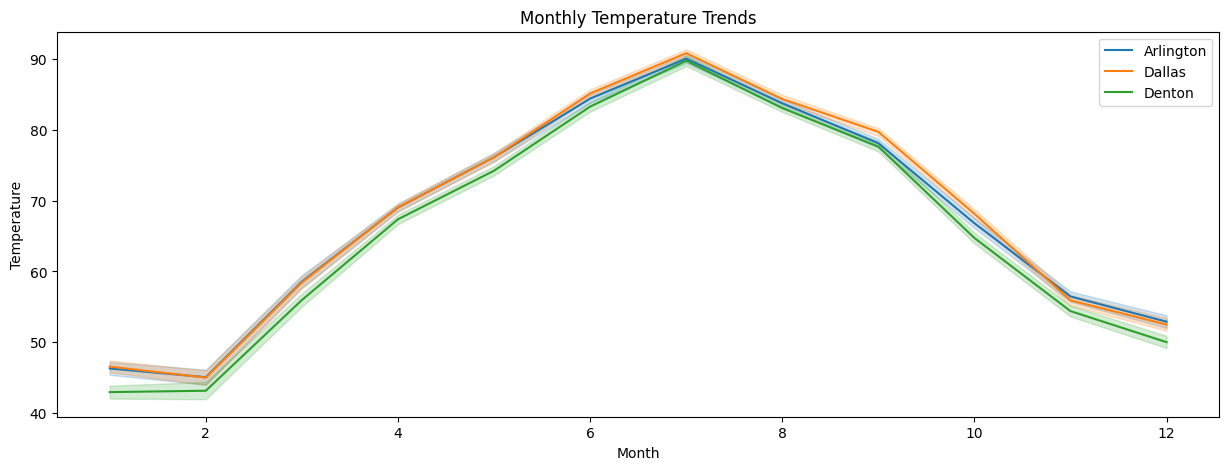

In [37]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month', y='HourlyDryBulbTemperature', data=arlington, label='Arlington')
sns.lineplot(x='Month', y='HourlyDryBulbTemperature', data=dallas, label='Dallas')
sns.lineplot(x='Month', y='HourlyDryBulbTemperature', data=denton, label='Denton')
plt.title('Monthly Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [38]:
########################################################################
# Begin Plot for "Region Comparison - Monthly Avg Drop in Temp at Night"
########################################################################

# Remove midnight "23:59:00" and only look at "nighttime" values for all 3 regions
plot_arlington = arlington[(arlington['Time'] != '23:59:00') & (arlington['Day_Night'] == 'Nighttime')].copy()
plot_dallas = dallas[(dallas['Time'] != '23:59:00') & (dallas['Day_Night'] == 'Nighttime')].copy()
plot_denton = denton[(denton['Time'] != '23:59:00') & (denton['Day_Night'] == 'Nighttime')].copy()

In [39]:
# Calculate "nightly rate of change" (high vs. low temps) for Arlington
plot_arlington['low'] = plot_arlington.groupby('Date')['HourlyDryBulbTemperature'].transform('min')
plot_arlington['high'] = plot_arlington.groupby('Date')['HourlyDryBulbTemperature'].transform('max')
plot_arlington['rate_of_change'] = (plot_arlington['high'] - plot_arlington['low']) / plot_arlington['low'] * 100

# Calculate "average monthly temperature rate of change" for Arlington
avg_rate_of_change_by_date = plot_arlington.groupby('Date')['rate_of_change'].mean().reset_index()
avg_rate_of_change_by_date['Date'] = pd.to_datetime(avg_rate_of_change_by_date['Date'])
avg_rate_of_change_by_date['Month'] = avg_rate_of_change_by_date['Date'].dt.month
avg_rate_of_change_by_month_arlington = avg_rate_of_change_by_date.groupby('Month')['rate_of_change'].mean().reset_index()

In [40]:
# Calculate "nightly rate of change" (high vs. low temps) for Dallas
plot_dallas['low'] = plot_dallas.groupby('Date')['HourlyDryBulbTemperature'].transform('min')
plot_dallas['high'] = plot_dallas.groupby('Date')['HourlyDryBulbTemperature'].transform('max')
plot_dallas['rate_of_change'] = (plot_dallas['high'] - plot_dallas['low']) / plot_dallas['low'] * 100

# Calculate "average monthly temperature rate of change" for Dallas
avg_rate_of_change_by_date = plot_dallas.groupby('Date')['rate_of_change'].mean().reset_index()
avg_rate_of_change_by_date['Date'] = pd.to_datetime(avg_rate_of_change_by_date['Date'])
avg_rate_of_change_by_date['Month'] = avg_rate_of_change_by_date['Date'].dt.month
avg_rate_of_change_by_month_dallas = avg_rate_of_change_by_date.groupby('Month')['rate_of_change'].mean().reset_index()

In [41]:
# Calculate "nightly rate of change" (high vs. low temps) for Denton
plot_denton['low'] = plot_denton.groupby('Date')['HourlyDryBulbTemperature'].transform('min')
plot_denton['high'] = plot_denton.groupby('Date')['HourlyDryBulbTemperature'].transform('max')
plot_denton['rate_of_change'] = (plot_denton['high'] - plot_denton['low']) / plot_denton['low'] * 100

# Calculate "nightly rate of change" (high vs. low temps) for Denton
avg_rate_of_change_by_date = plot_denton.groupby('Date')['rate_of_change'].mean().reset_index()
avg_rate_of_change_by_date['Date'] = pd.to_datetime(avg_rate_of_change_by_date['Date'])
avg_rate_of_change_by_date['Month'] = avg_rate_of_change_by_date['Date'].dt.month
avg_rate_of_change_by_month_denton = avg_rate_of_change_by_date.groupby('Month')['rate_of_change'].mean().reset_index()

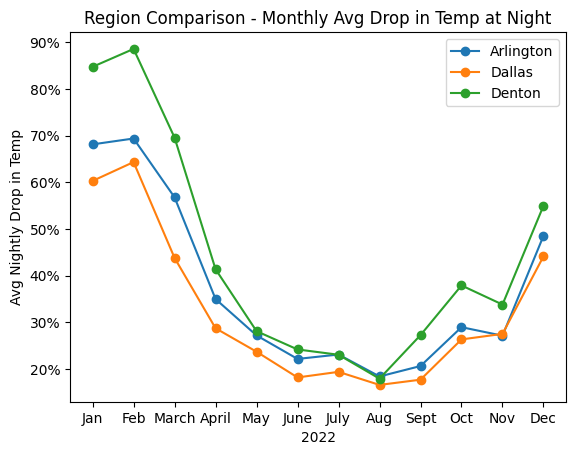

In [42]:
# Plot the data
plt.plot(avg_rate_of_change_by_month_arlington['Month'], avg_rate_of_change_by_month_arlington['rate_of_change'], label='Arlington', marker='o')
plt.plot(avg_rate_of_change_by_month_dallas['Month'], avg_rate_of_change_by_month_dallas['rate_of_change'], label='Dallas', marker='o')
plt.plot(avg_rate_of_change_by_month_denton['Month'], avg_rate_of_change_by_month_denton['rate_of_change'], label='Denton', marker='o')

# Change x-axis from "numbers of months" to "names of months"
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(avg_rate_of_change_by_month_arlington['Month'], months)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Labels for plot
plt.xlabel('2022')
plt.ylabel('Avg Nightly Drop in Temp')
plt.title('Region Comparison - Monthly Avg Drop in Temp at Night')
plt.grid(False)
plt.legend()
plt.show()

##########
# End Plot
##########

### **Feature Engineering**

In [43]:
# Calculate statistics for each season for DALLAS
seasonal_dallas = dallas.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_dallas

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,2634.0,67.042932,14.265842,30.0,56.0,69.0,78.0,98.0
Spring,2715.0,67.975059,12.681151,27.0,61.0,69.0,77.0,94.0
Summer,2522.0,86.649202,8.862565,65.0,80.0,86.0,94.0,107.0
Winter,2665.0,48.149829,14.432498,11.0,37.0,49.0,61.0,81.0


In [44]:
# Calculate statistics for each season for ARLINGTON
seasonal_arlington = arlington.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_arlington

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,2769.0,66.031157,14.235938,27.000000,55.0,66.779507,76.0,97.0
Spring,2815.0,68.219415,13.080171,21.000000,61.0,70.000000,77.0,95.0
Summer,2582.0,85.899006,9.204437,66.779507,79.0,85.000000,93.0,108.0
Winter,2772.0,48.333656,15.161430,11.000000,36.0,49.000000,62.0,91.6


In [45]:
# Calculate statistics for each season for DENTON
seasonal_denton = denton.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_denton

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,2737.0,64.294286,15.315628,24.0,53.0,65.041063,75.0,99.0
Spring,2786.0,66.098672,14.210371,18.0,58.0,67.000000,76.0,98.0
Summer,2572.0,85.197473,9.804702,64.0,78.0,85.000000,93.0,110.0
Winter,2713.0,45.650136,15.474265,10.0,32.0,47.000000,59.0,81.0


In [46]:
# Calculate the 25th, 50th, and 75th quartiles for each season for Dallas
dallas_temp = dallas.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50, 0.25]).unstack()
dallas_humidity = dallas.groupby('Season')['HourlyRelativeHumidity'].quantile([0.25, 0.50, 0.75]).unstack()
dallas_wind_speed = dallas.groupby('Season')['HourlyWindSpeed'].quantile([0.25, 0.50, 0.75]).unstack()

# Display the thresholds
print(dallas_temp)
print(dallas_humidity)
print(dallas_wind_speed)

        0.25  0.50  0.75
Season                  
Fall    56.0  69.0  78.0
Spring  61.0  69.0  77.0
Summer  80.0  86.0  94.0
Winter  37.0  49.0  61.0
        0.25  0.50   0.75
Season                   
Fall    47.0  63.0  83.00
Spring  47.0  63.0  77.00
Summer  40.0  55.0  68.75
Winter  45.0  63.0  84.00
        0.25  0.50  0.75
Season                  
Fall     5.0   7.0   9.0
Spring   7.0  11.0  15.0
Summer   6.0   8.0  10.0
Winter   5.0   8.0  11.0


In [47]:
# Calculate the 25th, 50th, and 75th quartiles for each season for Arlington
ar_temp = arlington.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50, 0.25]).unstack()
ar_humidity = arlington.groupby('Season')['HourlyRelativeHumidity'].quantile([0.75, 0.50, 0.25]).unstack()
ar_wind_speed = arlington.groupby('Season')['HourlyWindSpeed'].quantile([0.75, 0.50, 0.25]).unstack()

# Display the thresholds
print(ar_temp)
print(ar_humidity)
print(ar_wind_speed)

        0.25       0.50  0.75
Season                       
Fall    55.0  66.779507  76.0
Spring  61.0  70.000000  77.0
Summer  79.0  85.000000  93.0
Winter  36.0  49.000000  62.0
        0.25  0.50  0.75
Season                  
Fall    50.0  70.0  86.0
Spring  47.5  64.0  79.0
Summer  40.0  57.0  71.0
Winter  46.0  66.0  85.0
        0.25  0.50  0.75
Season                  
Fall     3.0   7.0  10.0
Spring   7.0  11.0  16.0
Summer   6.0   8.0  11.0
Winter   5.0   8.0  13.0


In [48]:
# Calculate the 25th, 50th, and 75th quartiles for each season for Denton
denton_temp = denton.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50, 0.25]).unstack()
denton_humidity = denton.groupby('Season')['HourlyRelativeHumidity'].quantile([0.75, 0.50, 0.25]).unstack()
denton_wind_speed = denton.groupby('Season')['HourlyWindSpeed'].quantile([0.75, 0.50, 0.25]).unstack()

# Display the thresholds
print(denton_temp)
print(denton_humidity)
print(denton_wind_speed)

        0.25       0.50  0.75
Season                       
Fall    53.0  65.041063  75.0
Spring  58.0  67.000000  76.0
Summer  78.0  85.000000  93.0
Winter  32.0  47.000000  59.0
        0.25  0.50  0.75
Season                  
Fall    51.0  72.0  90.0
Spring  50.0  67.0  81.0
Summer  41.0  58.5  74.0
Winter  50.0  70.0  86.0
        0.25  0.50  0.75
Season                  
Fall     5.0   8.0  10.0
Spring   7.0  13.0  17.0
Summer   6.0   8.0  11.0
Winter   5.0   8.0  13.0


In [49]:
def classify_uhi(row, temp_thresholds, humidity_thresholds, wind_speed_thresholds):
    season = row['Season']
    temp = row['HourlyDryBulbTemperature']
    humidity = row['HourlyRelativeHumidity']
    wind_speed = row['HourlyWindSpeed']

    # Get the thresholds for the current season
    temp_high = temp_thresholds.loc[season, 0.50]
    temp_medium = temp_thresholds.loc[season, 0.25]
    #temp_high = temp_thresholds.loc[season, 0.75]
    #temp_medium = temp_thresholds.loc[season, 0.50]
    humidity_low = humidity_thresholds.loc[season, 0.25]
    wind_speed_low = wind_speed_thresholds.loc[season, 0.25]

    # Classify based on combined criteria
    if temp > temp_high and humidity < humidity_low and wind_speed < wind_speed_low:
        return 'High'
    elif temp > temp_medium:
        return 'Medium'
    else:
        return 'Low'

In [50]:
# Apply the function
dallas['UHI Intensity'] = dallas.apply(lambda row: classify_uhi(row, dallas_temp, dallas_humidity, dallas_wind_speed), axis=1)
arlington['UHI Intensity'] = arlington.apply(lambda row: classify_uhi(row, ar_temp, ar_humidity, ar_wind_speed), axis=1)
denton['UHI Intensity'] = denton.apply(lambda row: classify_uhi(row, denton_temp, denton_humidity, denton_wind_speed), axis=1)

In [51]:
# for Dallas
print(dallas['UHI Intensity'].value_counts())

Medium    7520
Low       2769
High       247
Name: UHI Intensity, dtype: int64


In [52]:
# for Arlington
print(arlington['UHI Intensity'].value_counts())

Medium    7928
Low       2850
High       160
Name: UHI Intensity, dtype: int64


In [53]:
# for Denton
print(denton['UHI Intensity'].value_counts())

Medium    7770
Low       2849
High       189
Name: UHI Intensity, dtype: int64


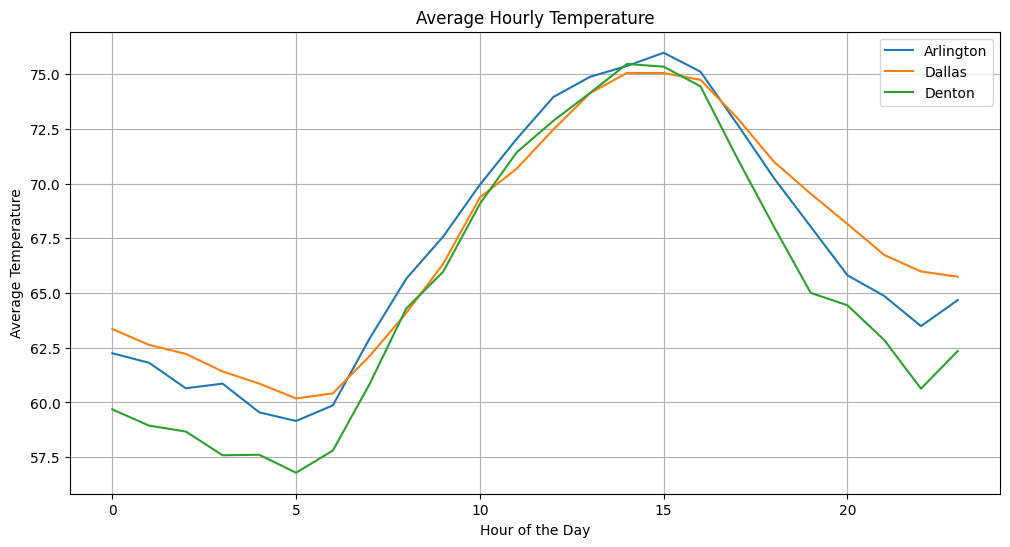

In [54]:
# Calculate the average temperature for each hour of the day for each city
arlington_hourly_avg = arlington.groupby('Hour')['HourlyDryBulbTemperature'].mean()
dallas_hourly_avg = dallas.groupby('Hour')['HourlyDryBulbTemperature'].mean()
denton_hourly_avg = denton.groupby('Hour')['HourlyDryBulbTemperature'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(arlington_hourly_avg, label='Arlington')
plt.plot(dallas_hourly_avg, label='Dallas')
plt.plot(denton_hourly_avg, label='Denton')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Temperature')
plt.title('Average Hourly Temperature')
plt.legend()
plt.grid(visible=True)
plt.show()

### **Temporal Analysis**

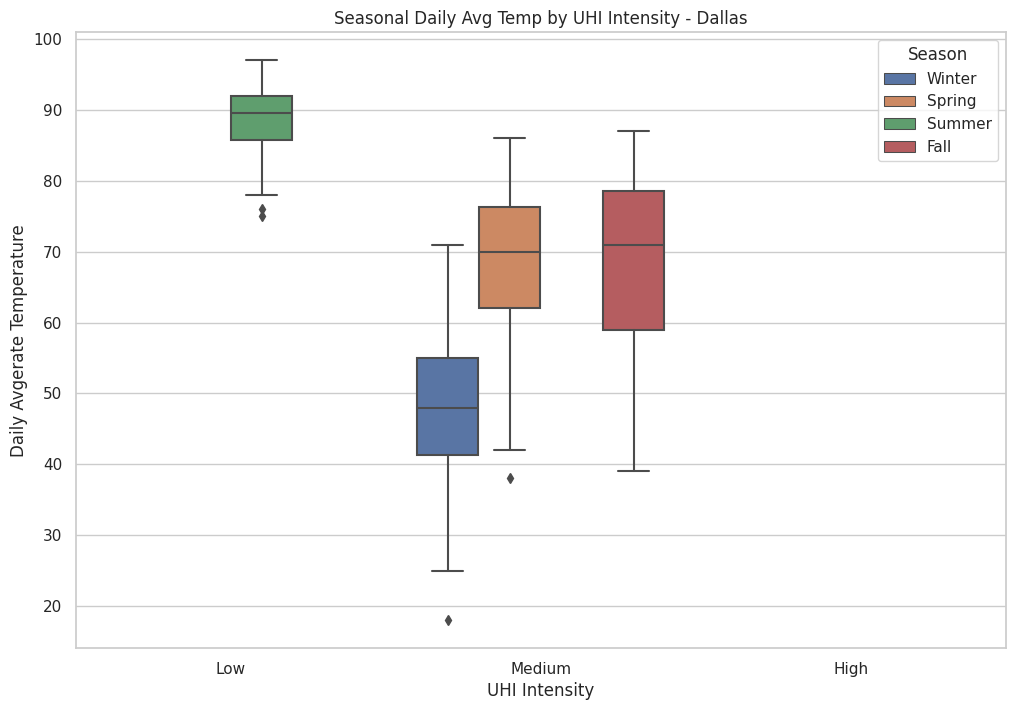

In [55]:
# UHI Intensity Seasonal Daily Avg Temp - Dallas

# Adding grid style to the plot
sns.set(style="whitegrid")

# Creating boxplot with different colors for "Season"
plt.figure(figsize=(12, 8))
sns.boxplot(x="UHI Intensity", y="DailyAverageDryBulbTemperature", hue="Season", data=dallas,
            order=["Low", "Medium", "High"], hue_order=["Winter", "Spring", "Summer", "Fall"])

# Set plot labels and title
plt.xlabel("UHI Intensity")
plt.ylabel("Daily Avgerate Temperature")
plt.title("Seasonal Daily Avg Temp by UHI Intensity - Dallas")

# Show the legend
plt.legend(title="Season")

# Show the plot
plt.show()

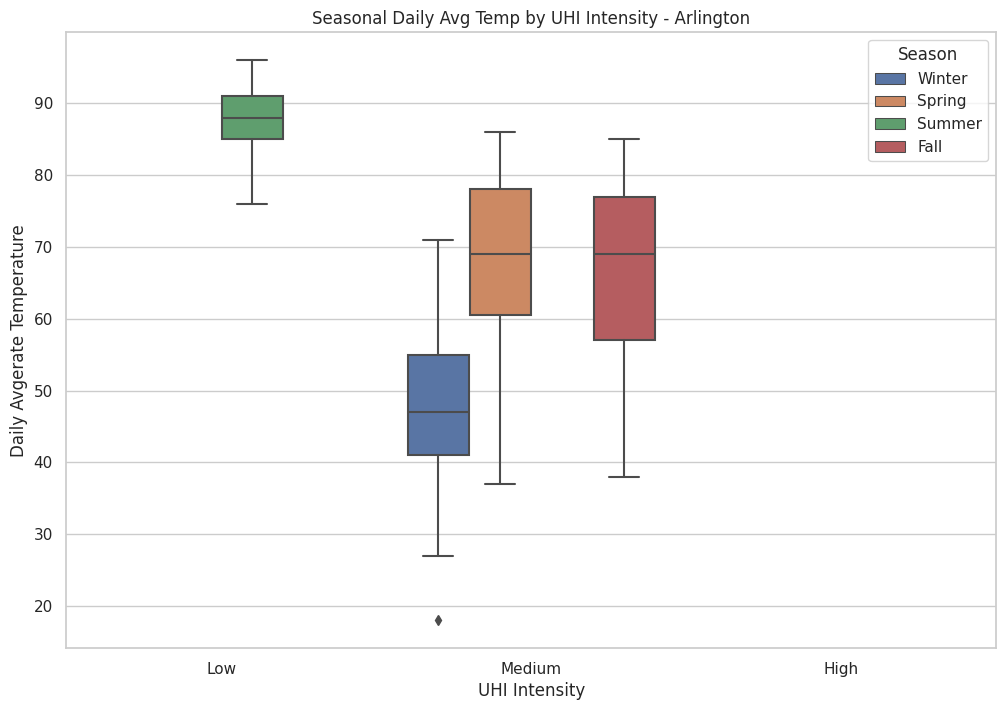

In [56]:
# UHI Intensity Seasonal Daily Avg Temp - Arlington

# Ensure numeric data types for the relevant columns
arlington['DailyAverageDryBulbTemperature'] = pd.to_numeric(arlington['DailyAverageDryBulbTemperature'], errors='coerce')

# Adding grid style to the plot
sns.set(style="whitegrid")

# Creating boxplot with different colors for "Season"
plt.figure(figsize=(12, 8))
sns.boxplot(x="UHI Intensity", y="DailyAverageDryBulbTemperature", hue="Season", data=arlington,
            order=["Low", "Medium", "High"], hue_order=["Winter", "Spring", "Summer", "Fall"])

# Set plot labels and title
plt.xlabel("UHI Intensity")
plt.ylabel("Daily Avgerate Temperature")
plt.title("Seasonal Daily Avg Temp by UHI Intensity - Arlington")

# Show the legend
plt.legend(title="Season")

# Show the plot
plt.show()

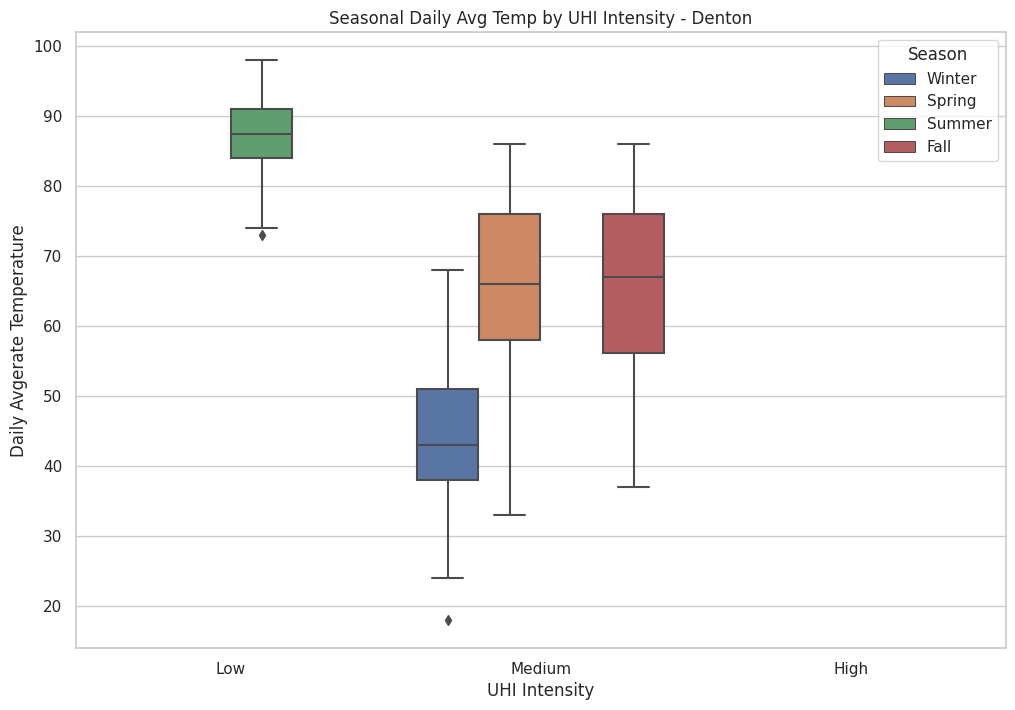

In [57]:
# UHI Intensity Seasonal Daily Avg Temp - Denton

# Ensure numeric data types for the relevant columns
denton['DailyAverageDryBulbTemperature'] = pd.to_numeric(denton['DailyAverageDryBulbTemperature'], errors='coerce')

# Adding grid style to the plot
sns.set(style="whitegrid")

# Creating boxplot with different colors for "Season"
plt.figure(figsize=(12, 8))
sns.boxplot(x="UHI Intensity", y="DailyAverageDryBulbTemperature", hue="Season", data=denton,
            order=["Low", "Medium", "High"], hue_order=["Winter", "Spring", "Summer", "Fall"])

# Set plot labels and title
plt.xlabel("UHI Intensity")
plt.ylabel("Daily Avgerate Temperature")
plt.title("Seasonal Daily Avg Temp by UHI Intensity - Denton")

# Show the legend
plt.legend(title="Season")

# Show the plot
plt.show()

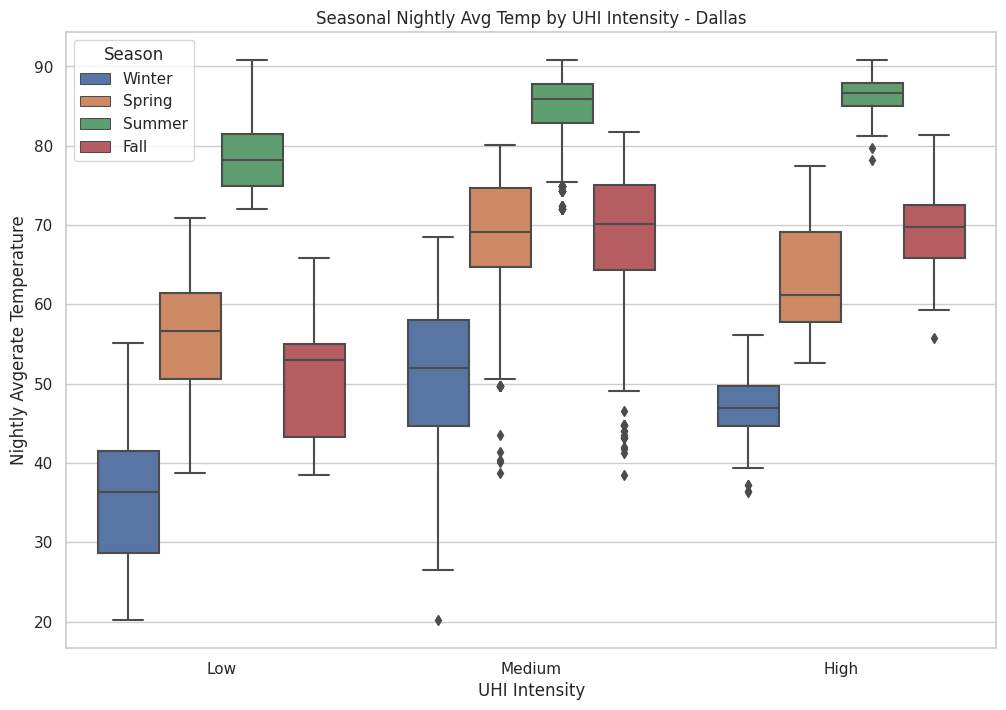

In [58]:
# UHI Intensity Seasonal Nightly Avg Temp - Dallas

# First format data
dallas['HourlyDryBulbTemperature'] = pd.to_numeric(dallas['HourlyDryBulbTemperature'], errors='coerce')
dallas['Date'] = pd.to_datetime(dallas['Date'])

# Filter rows only for 'Nighttime'
nighttime_data = dallas[dallas['Day_Night'] == 'Nighttime']

# Calculate the mean for each date
average_night_temp_dallas = nighttime_data.groupby('Date')['HourlyDryBulbTemperature'].mean()

# Merge average back to the original DataFrame based on the 'Date'
dallas = dallas.merge(average_night_temp_dallas.reset_index(name='average_night_temp_dallas'), on=['Date'], how='left')

# Adding grid style to the plot
sns.set(style="whitegrid")

# Creating boxplot with different colors for "Season"
plt.figure(figsize=(12, 8))
sns.boxplot(x="UHI Intensity", y="average_night_temp_dallas", hue="Season", data=dallas,
            order=["Low", "Medium", "High"], hue_order=["Winter", "Spring", "Summer", "Fall"])

# Set plot labels and title
plt.xlabel("UHI Intensity")
plt.ylabel("Nightly Avgerate Temperature")
plt.title("Seasonal Nightly Avg Temp by UHI Intensity - Dallas")

# Show the legend
plt.legend(title="Season")

# Show the plot
plt.show()

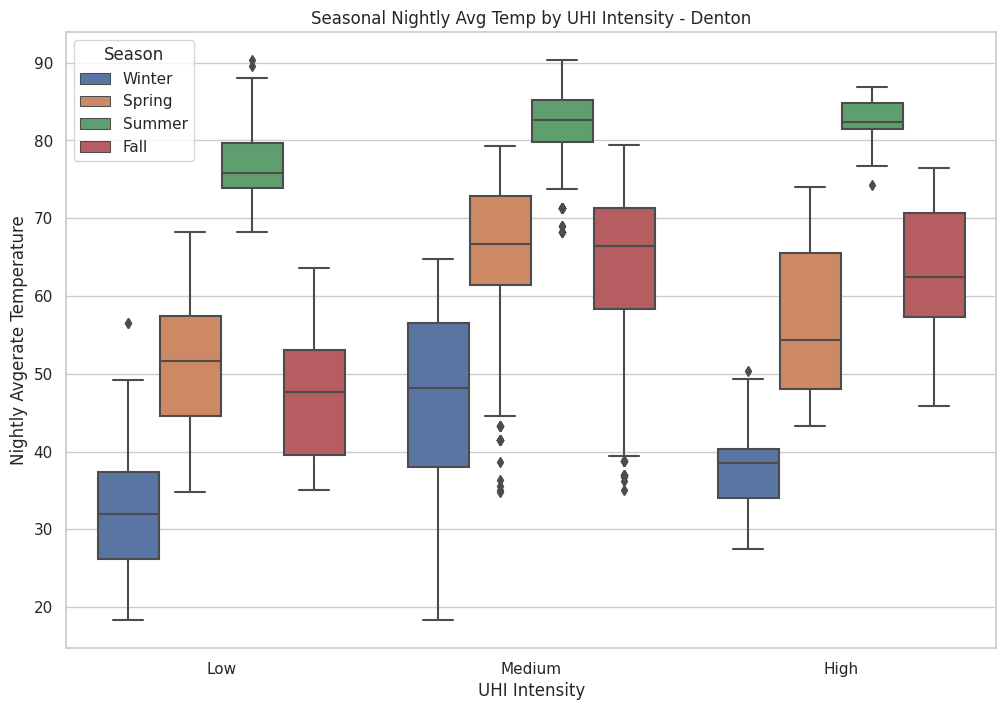

In [59]:
# UHI Intensity Seasonal Nightly Avg Temp - Denton

# First format data
denton['HourlyDryBulbTemperature'] = pd.to_numeric(denton['HourlyDryBulbTemperature'], errors='coerce')
denton['Date'] = pd.to_datetime(denton['Date'])

# Filter rows only for 'Nighttime'
nighttime_data = denton[denton['Day_Night'] == 'Nighttime']

# Calculate the mean for each date
average_night_temp_denton = nighttime_data.groupby('Date')['HourlyDryBulbTemperature'].mean()

# Merge average back to the original DataFrame based on the 'Date'
denton = denton.merge(average_night_temp_denton.reset_index(name='average_night_temp_denton'), on=['Date'], how='left')

# Adding grid style to the plot
sns.set(style="whitegrid")

# Creating boxplot with different colors for "Season"
plt.figure(figsize=(12, 8))
sns.boxplot(x="UHI Intensity", y="average_night_temp_denton", hue="Season", data=denton,
            order=["Low", "Medium", "High"], hue_order=["Winter", "Spring", "Summer", "Fall"])

# Set plot labels and title
plt.xlabel("UHI Intensity")
plt.ylabel("Nightly Avgerate Temperature")
plt.title("Seasonal Nightly Avg Temp by UHI Intensity - Denton")

# Show the legend
plt.legend(title="Season")

# Show the plot
plt.show()

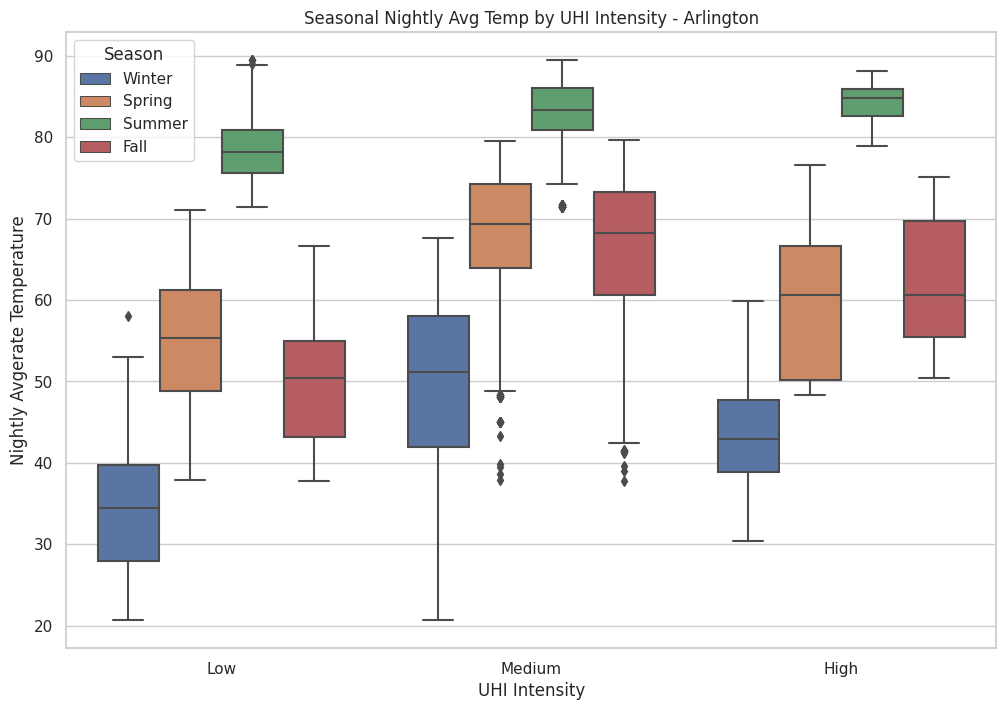

In [60]:
# UHI Intensity Seasonal Nightly Avg Temp - Arlington

# First format data
arlington['HourlyDryBulbTemperature'] = pd.to_numeric(arlington['HourlyDryBulbTemperature'], errors='coerce')
arlington['Date'] = pd.to_datetime(arlington['Date'])

# Filter rows only for 'Nighttime'
nighttime_data = arlington[arlington['Day_Night'] == 'Nighttime']

# Calculate the mean for each date
average_night_temp_arlington = nighttime_data.groupby('Date')['HourlyDryBulbTemperature'].mean()

# Merge average back to the original DataFrame based on the 'Date'
arlington = arlington.merge(average_night_temp_arlington.reset_index(name='average_night_temp_arlington'), on=['Date'], how='left')

# Adding grid style to the plot
sns.set(style="whitegrid")

# Creating boxplot with different colors for "Season"
plt.figure(figsize=(12, 8))
sns.boxplot(x="UHI Intensity", y="average_night_temp_arlington", hue="Season", data=arlington,
            order=["Low", "Medium", "High"], hue_order=["Winter", "Spring", "Summer", "Fall"])

# Set plot labels and title
plt.xlabel("UHI Intensity")
plt.ylabel("Nightly Avgerate Temperature")
plt.title("Seasonal Nightly Avg Temp by UHI Intensity - Arlington")

# Show the legend
plt.legend(title="Season")

# Show the plot
plt.show()

### **Model Development**

In [61]:
# Combining datasets
combined_data = pd.concat([dallas, arlington, denton])

In [62]:
combined_data = pd.get_dummies(combined_data, columns=['Season'])
features = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyRelativeHumidity','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindSpeed','HourlyWindDirection']


In [63]:
X = combined_data[features]  # Features
y = combined_data['UHI Intensity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the LabelEncoder
encoder= LabelEncoder()

# Fit and transform the labels in the training and testing sets
y_train_new = encoder.fit_transform(y_train)
y_test_new = encoder.transform(y_test)

**Model 1: Decision Tree Classifier**

In [65]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Prediction and Evaluation
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

        High       0.80      0.74      0.77       131
         Low       0.78      0.75      0.77      1646
      Medium       0.91      0.92      0.92      4680

    accuracy                           0.88      6457
   macro avg       0.83      0.81      0.82      6457
weighted avg       0.87      0.88      0.87      6457



**Model 2: Random Forest Classifier**

In [66]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.84      0.75      0.79       131
         Low       0.85      0.76      0.80      1646
      Medium       0.91      0.95      0.93      4680

    accuracy                           0.90      6457
   macro avg       0.87      0.82      0.84      6457
weighted avg       0.90      0.90      0.90      6457



**Hyperparameter Tuning**

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

cv_rfc = RandomizedSearchCV(estimator=rfc_model, param_distributions= param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300]})

In [69]:
y_pred_new = cv_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.84      0.75      0.79       131
         Low       0.85      0.76      0.80      1646
      Medium       0.91      0.95      0.93      4680

    accuracy                           0.90      6457
   macro avg       0.87      0.82      0.84      6457
weighted avg       0.90      0.90      0.90      6457



**Model 3: XGBoost Classifier**

In [70]:
# Using encoded labels to train the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_new)

# Prediction and Evaluation
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test_new, xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       131
           1       0.83      0.75      0.79      1646
           2       0.91      0.94      0.93      4680

    accuracy                           0.89      6457
   macro avg       0.85      0.82      0.83      6457
weighted avg       0.89      0.89      0.89      6457



**Model 4: Gradient Boost Classifier**

In [71]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train_new)

# Prediction and Evaluation
gb_pred = gb_model.predict(X_test)
print(classification_report(y_test_new, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81       131
           1       0.79      0.67      0.72      1646
           2       0.88      0.94      0.91      4680

    accuracy                           0.86      6457
   macro avg       0.84      0.79      0.81      6457
weighted avg       0.86      0.86      0.86      6457



**Model 5: SVM Classifier**

In [72]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction and Evaluation
svm_pred= svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       131
         Low       0.76      0.39      0.52      1646
      Medium       0.80      0.96      0.87      4680

    accuracy                           0.79      6457
   macro avg       0.52      0.45      0.46      6457
weighted avg       0.77      0.79      0.76      6457



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Comparison of Models**